#  Perceptron Classifier on the Penguins Dataset
In this notebook, we implement and evaluate the **Perceptron algorithm**, one of the foundational methods in machine learning for binary classification tasks.

We apply it to a subset of the **Palmer Penguins dataset**, using it to distinguish between **Adelie** and **Gentoo** penguin species based on physical characteristics.

##  What is a Perceptron?
A **Perceptron** is the simplest type of artificial neural network. It models a single neuron that:
- Takes several binary or continuous inputs
- Applies a set of weights and bias
- Outputs a decision (0 or 1) based on a linear combination followed by a step function

The Perceptron can solve **linearly separable** classification problems.

##  Understanding Our Dataset
We will classify penguins as **Adelie** (label 0) or **Gentoo** (label 1), using the following features:
- Bill Length
- Bill Depth
- Flipper Length
- Body Mass

We'll normalize these features and train a Perceptron using the standard algorithm. Finally, we will evaluate and visualize performance.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

##  Load and Prepare Data

In [2]:
penguins_df = pd.read_csv("penguins.csv")
penguins_df_clean = penguins_df.dropna()
penguins_df_binary = penguins_df_clean[penguins_df_clean['species'].isin(['Adelie', 'Gentoo'])].copy()
penguins_df_binary['label'] = penguins_df_binary['species'].map({'Adelie': 0, 'Gentoo': 1})
penguins_df_binary.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0


###  Quick Look at Data Distribution

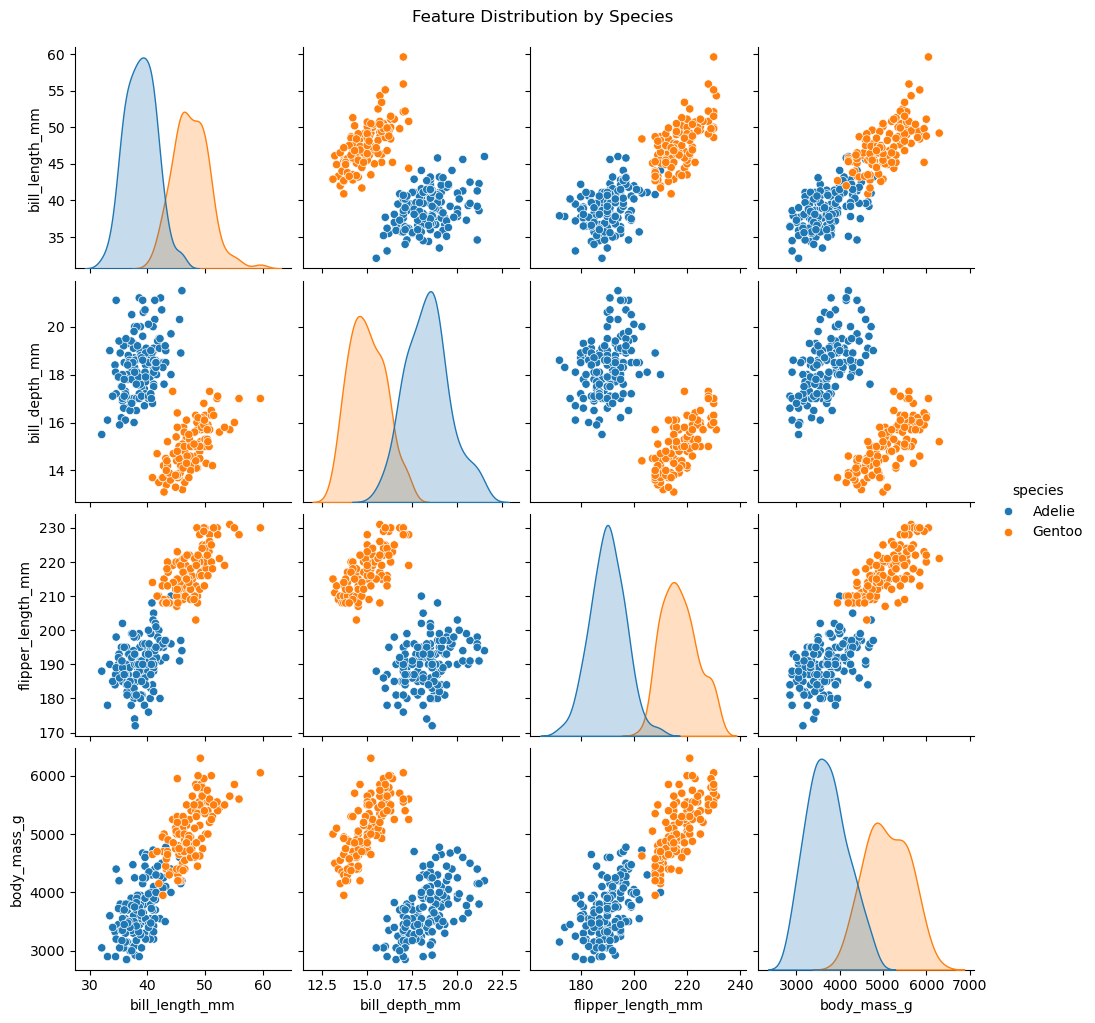

In [3]:
sns.pairplot(penguins_df_binary, hue='species', vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])
plt.suptitle('Feature Distribution by Species', y=1.02)
plt.show()

##  Feature Selection and Normalization

In [4]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = penguins_df_binary[features].values
y = penguins_df_binary['label'].values
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_norm = (X - X_mean) / X_std
X_bias = np.c_[np.ones(X_norm.shape[0]), X_norm]  # add bias column

##  Perceptron Implementation

In [5]:
def perceptron_train(X, y, epochs=10):
    weights = np.zeros(X.shape[1])
    for epoch in range(epochs):
        for i in range(X.shape[0]):
            prediction = 1 if np.dot(weights, X[i]) > 0 else 0
            error = y[i] - prediction
            weights += error * X[i]
    return weights

final_weights = perceptron_train(X_bias, y)

##  Evaluate Performance

In [6]:
def perceptron_predict(X, weights):
    return np.where(np.dot(X, weights) > 0, 1, 0)

predictions = perceptron_predict(X_bias, final_weights)
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


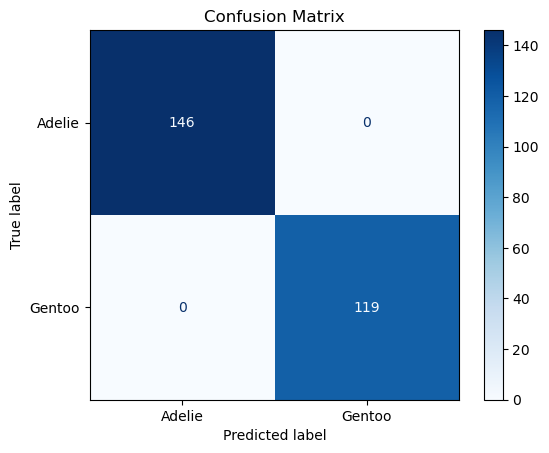

In [7]:
# Confusion Matrix
cm = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(cm, display_labels=['Adelie', 'Gentoo'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

##  Visualize Decision Boundary with PCA
Since we have 4 features, we'll use PCA to reduce to 2D for visualization.

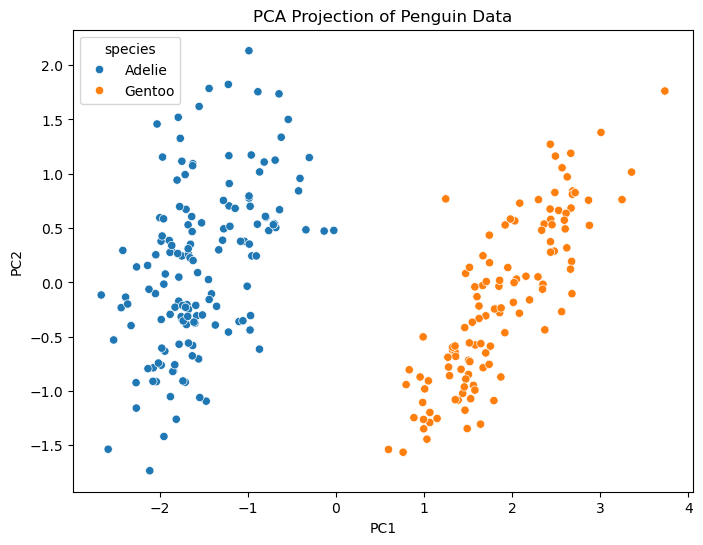

In [8]:
# PCA reduction for plotting
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_norm)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=penguins_df_binary['species'])
plt.title('PCA Projection of Penguin Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

##  Takeaways
- The Perceptron achieved high accuracy on this task because Adelie and Gentoo penguins are **linearly separable**.
- While effective here, the Perceptron may struggle on more complex datasets.
- Later models like **Logistic Regression** or **Neural Networks** generalize better to nonlinear problems.